**Sentiment Analysis** <br>
Week 2 | Project 2 | Level 1

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go

In [7]:
df = pd.read_csv("apps.csv")
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
apps = df.drop_duplicates()

In [9]:
ch_remove = ("+", "$", "%", ",")
col_clean = ["Size", "Installs", "Price"]

for col in col_clean:
    for char in ch_remove:
        apps[col] = apps[col].str.replace(char, "", regex=False)
    apps[col] = pd.to_numeric(apps[col], errors='coerce')


In [10]:
import plotly.graph_objects as go

n_categories = len(set(apps["Category"]))
print("Number of categories: ", n_categories)

n_apps_in_category = apps["Category"].value_counts().sort_values(ascending=False)

data1 = go.Bar(
    x=n_apps_in_category.index,
    y=n_apps_in_category.values
)

fig = go.Figure(data=[data1])
fig.show()


Number of categories:  33


In [11]:
print("Avg Job Rating: ", apps["Rating"].mean())

Avg Job Rating:  4.173243045387994


In [12]:
import plotly.graph_objs as go
import plotly.offline as pyo

S = apps["Rating"].max()
avg_rating = apps["Rating"].mean()

data = [go.Histogram(
    x = apps["Rating"],
    xbins = {"start": 1, "size": 0.1, "end": S})]

layout = {
    "shapes": [{
        "type": "line",
        "x0": avg_rating,
        "y0": 0,
        "x1": avg_rating,
        "y1": 1000,
        "line": {"dash": "dashdot"}}]}

pyo.iplot({"data": data, "layout": layout})


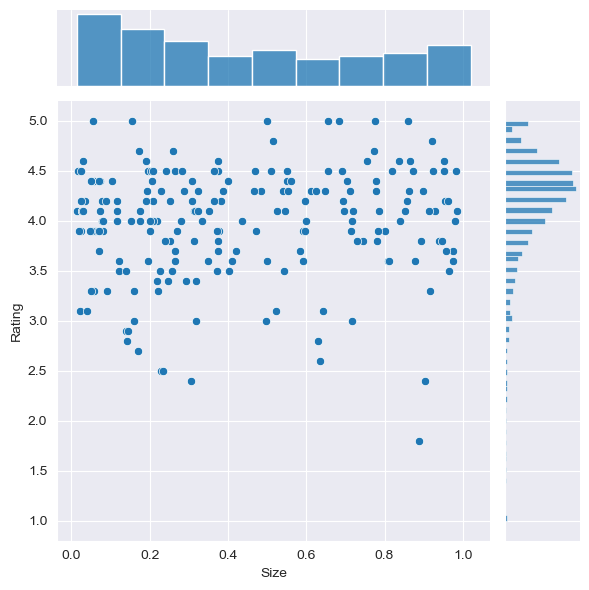

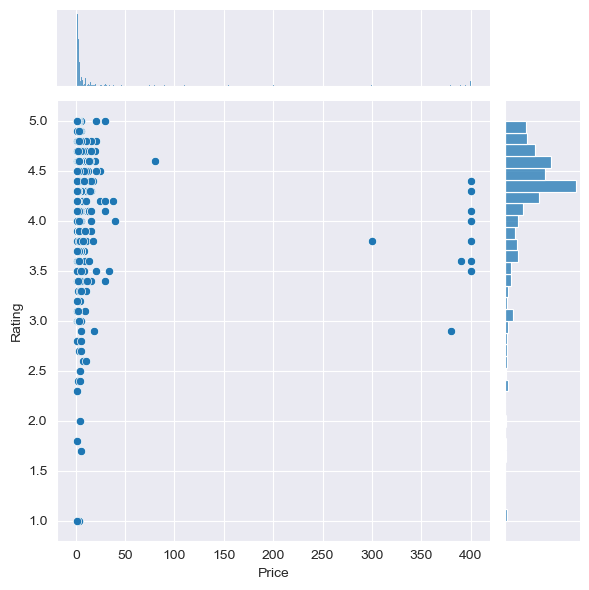

In [13]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

large_categories = apps.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()
paid_app = apps[apps["Type"] == "Paid"]
plt1 = sns.jointplot(x="Size", y="Rating", data=large_categories)
plt2 = sns.jointplot(x="Price", y="Rating", data=paid_app)


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


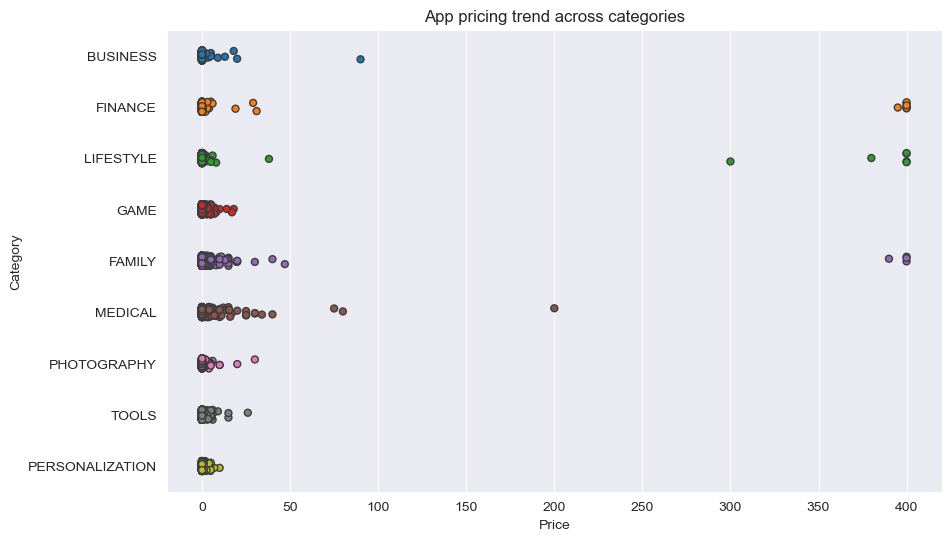

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
popular_app_cats = apps[apps.Category.isin(["GAME", "FAMILY", "PHOTOGRAPHY", "MEDICAL", "TOOLS", "FINANCE", "LIFESTYLE", "BUSINESS", "PERSONALIZATION"])]
ax = sns.stripplot(x="Price", y="Category", data=popular_app_cats, jitter=True, linewidth=1, hue="Category")
ax.set_title("App pricing trend across categories")
apps_above_200 = popular_app_cats[["Category", "App", "Price"]][popular_app_cats["Price"] > 200]
apps_above_200


In [18]:
tr0 = go.Box(y=apps["Installs"][apps["Type"] == "Paid"], name="Paid")
tr1 = go.Box(y=apps["Installs"][apps["Type"] == "Free"], name="Free")

layout = go.Layout(
    title="Downloads of Paid Apps vs Downloads of Free Apps",
    yaxis=dict(type="log", autorange=True)
)

data = [tr0, tr1]
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


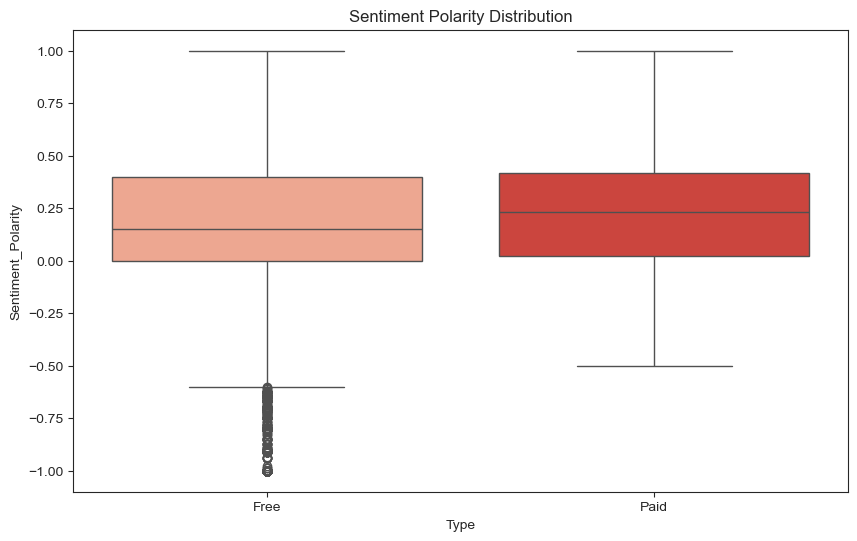

In [19]:
reviews_df = pd.read_csv("user_reviews.csv")
merged_df = pd.merge(apps, reviews_df, on="App", how="inner")

merged_df = merged_df.dropna(subset=["Sentiment", "Translated_Review"])

sns.set_style("ticks")
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax = sns.boxplot(x="Type", y="Sentiment_Polarity", palette="Reds", data=merged_df)
ax.set_title("Sentiment Polarity Distribution")
plt.show()
